## Import Libraries

In [1]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Download Dataset

In [2]:
url = "https://www.openml.org/data/download/22102255/dataset"
response = requests.get(url, allow_redirects=True)

with open("dataset.txt", "wb") as file:
    file.write(response.content)

In [3]:
data = []
columns = []

with open("dataset.txt", "r") as file:
    for line in file.read().split("\n"):
        if line.startswith("@ATTRIBUTE"):
            columns.append(line.split(" ")[1])
        elif line.startswith("@") or line.startswith("%") or line == "":
            continue
        else:
            data.append(line)

In [4]:
with open("dataframe.csv", "w") as file:
    file.write(",".join(columns))
    file.write("\n")
    file.write("\n".join(data))

In [5]:
df = pd.read_csv("dataframe.csv")
df.columns = columns

In [6]:
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T


## Data Preprocessing

In [7]:
df["t_win"] = df.round_winner.astype("category").cat.codes
columns = columns + ["t_win"]
df = df.drop(["map", "round_winner"], axis=1)

In [8]:
correlations = df.corr()
print(correlations["t_win"].apply(abs).sort_values(ascending=False).iloc[:25])

t_win                           1.000000
ct_armor                        0.336382
ct_helmets                      0.308255
t_helmets                       0.297458
ct_defuse_kits                  0.291557
t_armor                         0.290753
ct_grenade_flashbang            0.253868
ct_players_alive                0.216798
ct_grenade_smokegrenade         0.209975
ct_weapon_awp                   0.198626
t_weapon_ak47                   0.194147
ct_health                       0.190662
bomb_planted                    0.187101
ct_weapon_m4a4                  0.178008
ct_grenade_hegrenade            0.168781
ct_grenade_incendiarygrenade    0.168517
ct_weapon_ak47                  0.166855
t_grenade_flashbang             0.166839
ct_weapon_sg553                 0.163963
t_weapon_sg553                  0.163709
ct_weapon_usps                  0.152893
t_weapon_awp                    0.149878
t_players_alive                 0.142518
t_grenade_smokegrenade          0.140348
t_weapon_usps   

In [9]:
selected_columns = []

for column in columns:
    try:
        if abs(correlations[column]["t_win"]) > 0.15:
            selected_columns.append(column)
    except:
        pass

df = df[selected_columns]

In [10]:
df

,bomb_planted,ct_health,ct_armor,t_armor,ct_helmets,t_helmets,ct_defuse_kits,ct_players_alive,ct_weapon_ak47,t_weapon_ak47,...,ct_weapon_m4a4,ct_weapon_sg553,t_weapon_sg553,ct_weapon_usps,ct_grenade_hegrenade,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_win
0,False,500.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
1,False,500.0,400.0,300.0,0.0,0.0,1.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
2,False,391.0,294.0,200.0,0.0,0.0,1.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
3,False,391.0,294.0,200.0,0.0,0.0,1.0,4.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
4,False,500.0,192.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,True,200.0,195.0,359.0,2.0,4.0,1.0,2.0,0.0,1.0,...,1.0,0.0,2.0,2.0,0.0,1.0,2.0,1.0,0.0,1
122406,False,500.0,95.0,175.0,1.0,2.0,1.0,5.0,0.0,0.0,...,1.0,0.0,1.0,5.0,0.0,1.0,2.0,1.0,0.0,1
122407,False,500.0,495.0,475.0,3.0,5.0,1.0,5.0,0.0,2.0,...,1.0,0.0,1.0,1.0,2.0,4.0,4.0,3.0,1.0,1
122408,False,500.0,495.0,475.0,3.0,5.0,1.0,5.0,0.0,2.0,...,1.0,0.0,2.0,1.0,2.0,1.0,5.0,0.0,0.0,1


## Data Exploration

<Axes: >

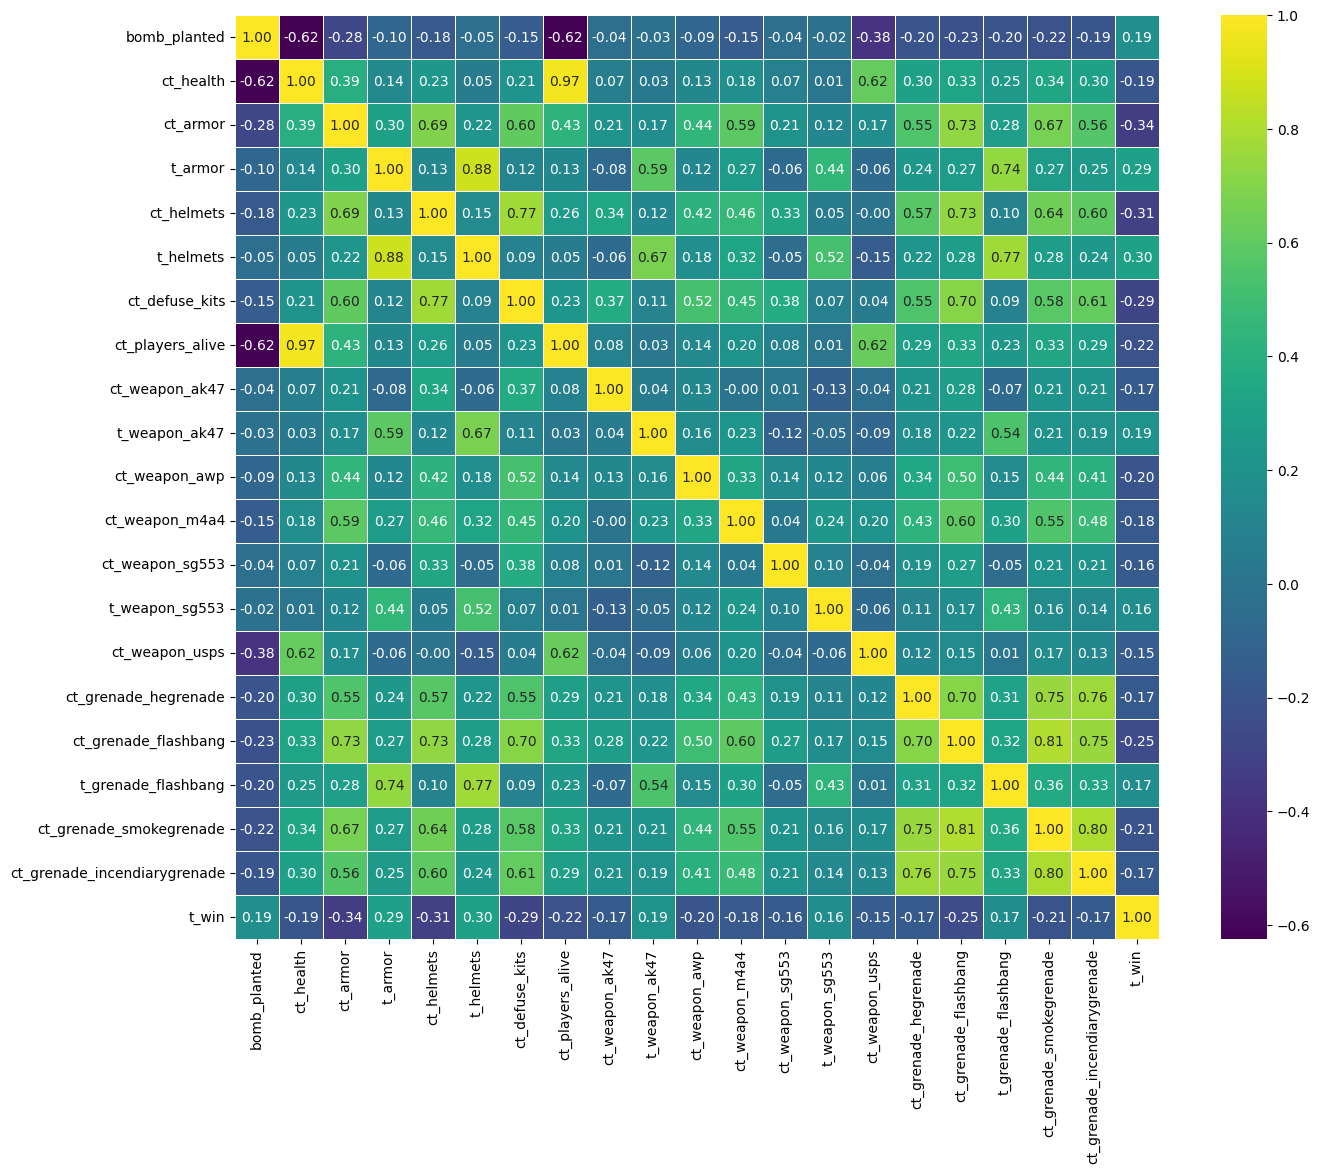

In [11]:
plt.figure(figsize = (16,12))
sns.heatmap(df.corr(), cmap="viridis", annot=True, fmt=".2f", square=True, linewidths=.5)

array([[<Axes: title={'center': 'ct_health'}>,
        <Axes: title={'center': 'ct_armor'}>,
        <Axes: title={'center': 't_armor'}>,
        <Axes: title={'center': 'ct_helmets'}>],
       [<Axes: title={'center': 't_helmets'}>,
        <Axes: title={'center': 'ct_defuse_kits'}>,
        <Axes: title={'center': 'ct_players_alive'}>,
        <Axes: title={'center': 'ct_weapon_ak47'}>],
       [<Axes: title={'center': 't_weapon_ak47'}>,
        <Axes: title={'center': 'ct_weapon_awp'}>,
        <Axes: title={'center': 'ct_weapon_m4a4'}>,
        <Axes: title={'center': 'ct_weapon_sg553'}>],
       [<Axes: title={'center': 't_weapon_sg553'}>,
        <Axes: title={'center': 'ct_weapon_usps'}>,
        <Axes: title={'center': 'ct_grenade_hegrenade'}>,
        <Axes: title={'center': 'ct_grenade_flashbang'}>],
       [<Axes: title={'center': 't_grenade_flashbang'}>,
        <Axes: title={'center': 'ct_grenade_smokegrenade'}>,
        <Axes: title={'center': 'ct_grenade_incendiarygrenad

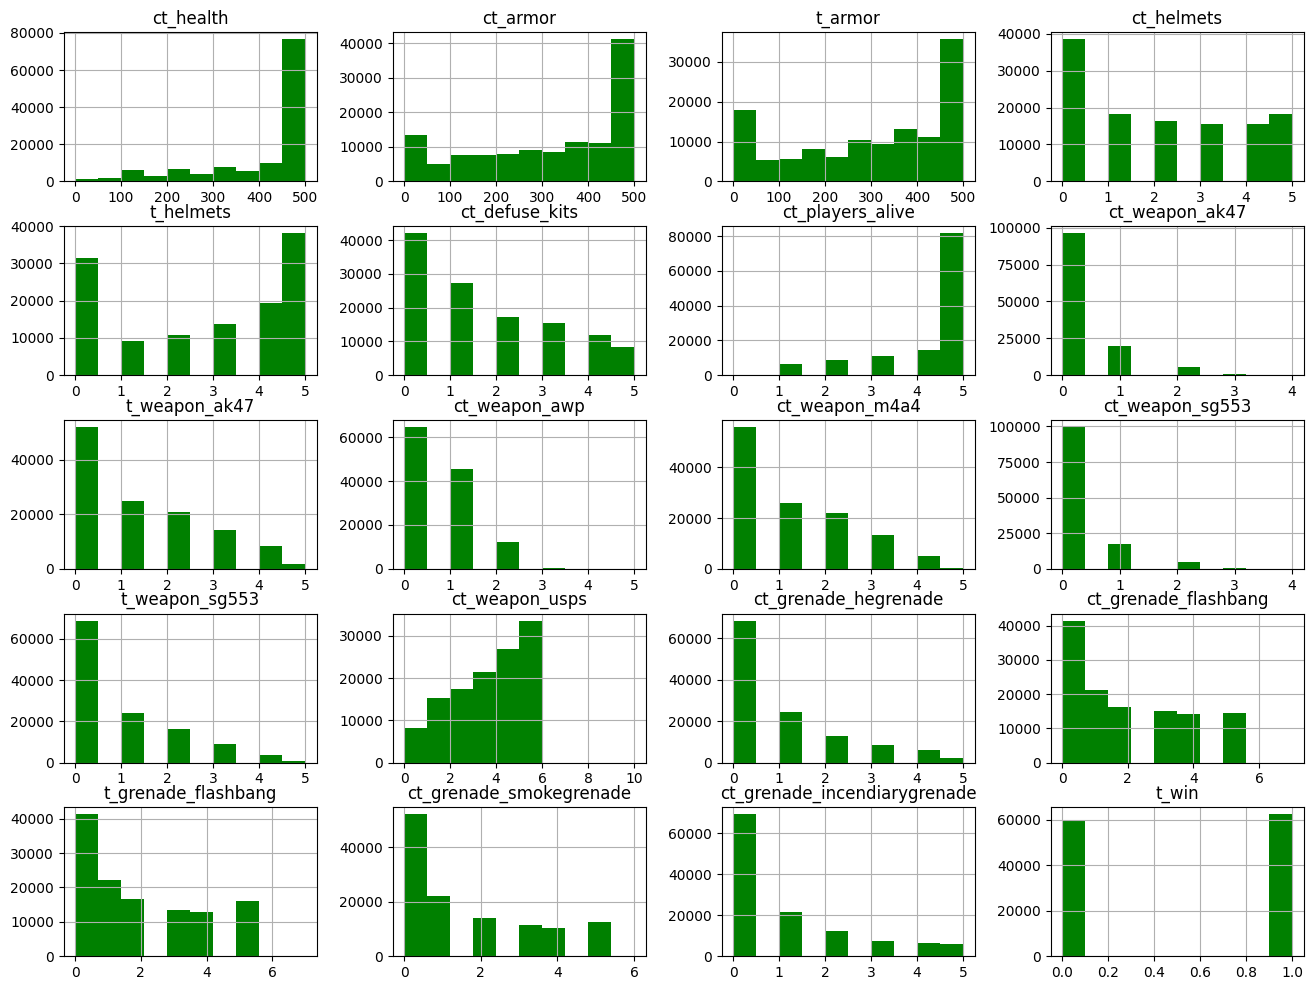

In [12]:
df.hist(figsize=(16, 12), color="green")

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 21 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   bomb_planted                  122410 non-null  bool   
 1   ct_health                     122410 non-null  float64
 2   ct_armor                      122410 non-null  float64
 3   t_armor                       122410 non-null  float64
 4   ct_helmets                    122410 non-null  float64
 5   t_helmets                     122410 non-null  float64
 6   ct_defuse_kits                122410 non-null  float64
 7   ct_players_alive              122410 non-null  float64
 8   ct_weapon_ak47                122410 non-null  float64
 9   t_weapon_ak47                 122410 non-null  float64
 10  ct_weapon_awp                 122410 non-null  float64
 11  ct_weapon_m4a4                122410 non-null  float64
 12  ct_weapon_sg553               122410 non-nul

## Data Splitting and Scaling

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(["t_win"], axis=1)
y = df["t_win"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## K-Nearest Neighbors Classification

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
knn.score(X_test, y_test)

0.769095662119108

In [26]:
from sklearn.model_selection import RandomizedSearchCV

knn = KNeighborsClassifier()

param_grid = {
    "n_neighbors": list(range(5, 20, 2)),
    "weights": ["uniform","distance"]
}

rs_knn = RandomizedSearchCV(knn, param_grid, n_iter=4, cv=4)
rs_knn.fit(X_train, y_train)

RandomizedSearchCV(cv=4, estimator=KNeighborsClassifier(), n_iter=4,
                   param_distributions={'n_neighbors': [5, 7, 9, 11, 13, 15, 17,
                                                        19],
                                        'weights': ['uniform', 'distance']})

In [27]:
rs_knn.best_estimator_

KNeighborsClassifier(n_neighbors=15, weights='distance')

In [28]:
rs_knn.score(X_test, y_test)

0.7875990523650028

## Random Forest Classification

In [29]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

forest.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
forest.score(X_test, y_test)

0.830814475941508

In [52]:
from sklearn.model_selection import RandomizedSearchCV

forest = RandomForestClassifier()

param_grid = {
    "n_estimators": list(range(100, 500, 50)),
    "min_samples_split": list(range(2, 10, 2)),
    "max_depth": [None, 2, 4, 8]
}

rs_rf = RandomizedSearchCV(forest, param_grid, n_iter=10, cv=4)
rs_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 2, 4, 8],
                                        'min_samples_split': [2, 4, 6, 8],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 350, 400, 450]})

In [53]:
rs_rf.best_estimator_

RandomForestClassifier(n_estimators=400)

In [54]:
rs_rf.score(X_test, y_test)

0.831876480679683

## Neural Network Classification

In [40]:
from keras import layers, losses, models

model = models.Sequential(
    [
        layers.Input(shape=(X_train.shape[1],)),
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1, activation="linear"),
    ]
)

In [41]:
model.compile(optimizer="adam", loss=losses.BinaryCrossentropy(from_logits=True), metrics=["accuracy"])

In [47]:
model.fit(X_train, y_train, epochs=20, verbose=0)

In [48]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(accuracy)

0.758353054523468
